# Home Exercise on Linear Regression

## Task Description

Implement a **linear regression** model using **gradient descent, Adam, or any other optimization method** to optimize the parameters, or use a **closed-form solution**. *(You can also implement variations of Linear Regression, such as Lasso, Ridge, etc., but you must implement them yourself.)*

- You are **only allowed** to use **computational libraries** such as **NumPy, Math, etc.** for implementing the **model and training process**.
- You **must not** use machine learning libraries or frameworks like **scikit-learn, TensorFlow, PyTorch, etc.** that provide pre-built models.
- For other tasks (e.g., data processing, visualization), you are free to use **any library**.

After implementing the model, use it to solve the following problem:  
[**Housing Prices Competition for Kaggle Learn Users**](https://www.kaggle.com/competitions/home-data-for-ml-course)

---

## Submission Guidelines

- Submit **only one Jupyter Notebook** file that:
  1. **Handles all tasks**, including **data downloading, preprocessing, model training** and **evaluation**.
  2. **Generates a CSV** result file.
  3. **Includes an image** of the submission results on Kaggle.

- **Important**:
  - **Submissions not following the guidelines will receive a score of 0.**

---

## Grading Criteria

For valid submissions, scores will be assigned based on the **leaderboard ranking** (**strictly greater**):

| Leaderboard Ranking | Score |
|---------------------|-------|
| **Top 25%**        | **10 points** |
| **25% - 50%**      | **9.0 points** |
| **50% - 75%**      | **8.0 points** |
| **75% - 100%**     | **7.0 points** |


# Download and Import

In [318]:
%pip install gdown pandas numpy matplotlib scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.


In [319]:
import gdown
import zipfile
import sys
import os
import platform
import re
from tqdm import tqdm
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression # i use this here to test the model
from itertools import product  


In [320]:
# Python environment details
print("Python executable being used:", sys.executable)
print("Python version:", sys.version)

# Operating System details
print("Operating System:", platform.system())
print("OS Version:", platform.version())
print("OS Release:", platform.release())

# Machine and architecture details
print("Machine:", platform.machine())

# Visual Studio Code details (based on environment variable)
vscode_info = os.environ.get('VSCODE_PID', None)
if vscode_info:
    print("Running in Visual Studio Code")
else:
    print("Not running in Visual Studio Code")

Python executable being used: e:\anaconda3\envs\ml_env_test\python.exe
Python version: 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:48:34) [MSC v.1929 64 bit (AMD64)]
Operating System: Windows
OS Version: 10.0.19045
OS Release: 10
Machine: AMD64
Running in Visual Studio Code


In [321]:
tqdm.pandas(desc="Processing text")

# Preprocessing

This following cell will be run when using kaggle

In [322]:
if not vscode_info:
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

This following cell will be run when local in vscode

In [323]:
# https://drive.google.com/file/d/19tQZiViPNrrh9Y9Ne1IHViHZEC8B5Nkg/view?usp=sharing
if vscode_info:
    # Define the destination directory
    output_dir = "Data"  # Change this to your desired directory

    # Ensure the directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Download the file
    url = "https://drive.google.com/uc?id=19tQZiViPNrrh9Y9Ne1IHViHZEC8B5Nkg"
    output_zip = "home-data-for-ml-course.zip"
    gdown.download(url, output_zip, quiet=False)

    # Extract all contents to the specified directory
    with zipfile.ZipFile(output_zip, "r") as zip_ref:
        zip_ref.extractall(output_dir)

    print(f"Files extracted to: {output_dir}")

Downloading...
From: https://drive.google.com/uc?id=19tQZiViPNrrh9Y9Ne1IHViHZEC8B5Nkg
To: e:\2_LEARNING_BKU\2_File_2\K22_HK242\CO3085_NLP\BT\Lab06\home-data-for-ml-course.zip
100%|██████████| 395k/395k [00:00<00:00, 2.22MB/s]

Files extracted to: Data


In [324]:
# Load dataset
if vscode_info:
    file_path = "data/train.csv"  
else:
    file_path = "/kaggle/input/home-data-for-ml-course/train.csv"  
df = pd.read_csv(file_path)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [325]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [326]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [327]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [328]:
target_column = "SalePrice"
features = [col for col in df.columns if df[col].dtype in [np.int64, np.float64] and col != target_column]

df[features] = df[features].fillna(df[features].median())

# Normalize data
df[features] = (df[features] - df[features].mean()) / df[features].std()

# Normalize by min max
# df[features] = (df[features] - df[features].min()) / (df[features].max() - df[features].min())



In [329]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000
mean,0.000000,-3.710882e-17,2.774037e-16,-7.056760e-17,9.976799e-17,3.735216e-16,1.057297e-15,4.487126e-15,0.000000,-3.406712e-17,...,9.246789e-17,3.285043e-17,-2.433366e-18,-9.733462e-18,5.170902e-17,-4.866731e-18,-2.676702e-17,1.046347e-16,3.566401e-14,180921.195890
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,79442.502883
min,-1.730272,-8.722639e-01,-2.218286e+00,-9.234128e-01,-3.687150e+00,-4.111561e+00,-3.286697e+00,-1.688790e+00,-0.570555,-9.726849e-01,...,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.968437e+00,-1.367186e+00,34900.000000
25%,-0.865136,-8.722639e-01,-4.477866e-01,-2.968890e-01,-7.948791e-01,-5.170227e-01,-5.717268e-01,-8.653621e-01,-0.570555,-9.726849e-01,...,-7.519182e-01,-7.042419e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-4.889425e-01,-6.142282e-01,129975.000000
50%,0.000000,-1.630536e-01,-3.920970e-02,-1.040277e-01,-7.181151e-02,-5.170227e-01,5.735183e-02,4.424348e-01,-0.570555,-1.318570e-01,...,-7.519182e-01,-3.269178e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,-1.190689e-01,1.387300e-01,163000.000000
75%,0.865136,3.097533e-01,4.147646e-01,1.086708e-01,6.512561e-01,3.816120e-01,9.513056e-01,9.268040e-01,0.338253,5.889309e-01,...,5.884489e-01,3.220798e-01,-3.592018e-01,-1.162994e-01,-2.701158e-01,-6.866822e-02,-8.765778e-02,6.206783e-01,8.916881e-01,214000.000000
max,1.730272,3.146594e+00,1.103776e+01,2.051125e+01,2.820459e+00,3.077516e+00,1.282400e+00,1.217426e+00,8.282363,1.140185e+01,...,6.085550e+00,7.551611e+00,8.672338e+00,1.721134e+01,8.338605e+00,1.829991e+01,3.115459e+01,2.100173e+00,1.644646e+00,755000.000000


# Building Funcs

## Understanding the Gradient Descent Formula in `LinearRegressionGD`

In the `fit` method of the **`LinearRegressionGD`** class, the gradient descent update rule is applied to optimize the **parameters (weights) `theta`** for linear regression.

---

### **1. Cost Function (Mean Squared Error - MSE)**
The cost function measures how well the model fits the data:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2
$$

where:
- $ m $ = number of training examples
- $ h_{\theta}(x) $ = predicted value = $ X\theta $
- $ y $ = actual target values
- $ X $ = feature matrix
- $ \theta $ = model parameters (weights)

---

### **2. Gradient Calculation**
To minimize the cost function $ J(\theta) $, we compute the **gradient** (partial derivative of the cost function with respect to `theta`):

$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (X\theta - y)
$$

where:
- $ X^T $ is the **transpose** of the feature matrix $ X $.
- $ X\theta - y $ is the **error vector** (difference between predicted and actual values).

This gradient tells us **how to adjust `theta`** to minimize the cost function.

---

### **3. Gradient Descent Update Rule**
Using the computed gradient, we update the model parameters (`theta`) using the gradient descent rule:

$$
\theta := \theta - \alpha \cdot \frac{1}{m} X^T (X\theta - y)
$$

where:
- $ \alpha $ is the **learning rate** (step size).
- $ \frac{1}{m} X^T (X\theta - y) $ is the **gradient**.

The learning rate $ \alpha $ controls **how big of a step** we take towards the optimal solution in each iteration.

---


In [330]:
class LinearRegressionGD:
    """
    A simple implementation of Linear Regression using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating the model parameters (theta).
    
    iterations : int, default=1000
        The number of iterations to perform in the gradient descent optimization.

    gradient_type : str, default="batch"
        The type of gradient descent to use:
        - "batch" for Batch Gradient Descent
        - "stochastic" for Stochastic Gradient Descent (SGD)
        - "mini-batch" for Mini-Batch Gradient Descent

    batch_size : int, optional (only used for mini-batch), default=32
        The batch size to use for Mini-Batch Gradient Descent.
    """

    def __init__(self, gradient_type="batch", learning_rate=0.01, iterations=1000, batch_size=32):
        """
        Initializes the Linear Regression model with gradient descent.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.gradient_type = gradient_type.lower()  # Ensure lowercase
        self.batch_size = batch_size if self.gradient_type == "mini-batch" else None
        self.theta = None  # Model parameters
        self.training_loss = []

    def fit(self, X, y):
        """
        Trains the linear regression model using the selected gradient descent method.
        """
        m, n = X.shape
        self.training_loss = []
        self.theta = np.zeros((n, 1))  # Initialize parameters with zeros

        if self.gradient_type == "batch":
            self._batch_gradient_descent(X, y, m)
        elif self.gradient_type == "stochastic":
            self._stochastic_gradient_descent(X, y, m)
        elif self.gradient_type == "mini-batch":
            self._mini_batch_gradient_descent(X, y, m)
        else:
            raise ValueError("Invalid gradient_type. Choose 'batch', 'stochastic', or 'mini-batch'.")

    def _batch_gradient_descent(self, X, y, m):
        """ Performs Batch Gradient Descent (updates after all samples). """
        for i in range(self.iterations):
            gradient = (1/m) * X.T @ (X @ self.theta - y)
            self.theta -= self.learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X @ self.theta - y) ** 2)
            self.training_loss.append(cost)

    def _stochastic_gradient_descent(self, X, y, m):
        """ Performs Stochastic Gradient Descent (updates per sample). """
        for i in range(self.iterations):
            for j in range(m):
                random_index = np.random.randint(m)
                X_sample = X[random_index, :].reshape(1, -1)
                y_sample = y[random_index].reshape(-1, 1)
                gradient = X_sample.T @ (X_sample @ self.theta - y_sample)
                self.theta -= self.learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X @ self.theta - y) ** 2)
            self.training_loss.append(cost)

    def _mini_batch_gradient_descent(self, X, y, m):
        """ Performs Mini-Batch Gradient Descent (updates per batch). """
        batch_size = self.batch_size or 32  # Default batch size
        for i in range(self.iterations):
            indices = np.random.permutation(m)
            X_shuffled, y_shuffled = X[indices], y[indices]
            for j in range(0, m, batch_size):
                X_batch = X_shuffled[j:j+batch_size]
                y_batch = y_shuffled[j:j+batch_size]
                gradient = (1/len(X_batch)) * X_batch.T @ (X_batch @ self.theta - y_batch)
                self.theta -= self.learning_rate * gradient
            cost = (1/(2*m)) * np.sum((X @ self.theta - y) ** 2)
            self.training_loss.append(cost)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        """
        return X @ self.theta
    
    def get_training_loss(self):
        """
        Returns the recorded training loss during gradient descent.
        """
        return self.training_loss


## Linear Regression with Adam Optimization
This model implements **Linear Regression** using **Adam optimization**, a powerful variant of gradient descent.

### **How It Works**
Adam combines:
- **Momentum (β1):** Smooths updates using an exponentially moving average of gradients.
- **Adaptive Learning Rate (β2):** Adjusts the learning rate for each parameter.

### **Update Rule**
At each step:
1. Compute the **gradient** of the cost function:
   $$
   g_t = \frac{1}{m} X^T (X\theta - y)
   $$

2. Update the **first moment estimate (momentum)**:
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
   $$

3. Update the **second moment estimate (RMS scaling)**:
   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
   $$

4. Apply **bias correction**:
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$

5. Update parameters:
   $$
   \theta := \theta - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$



In [331]:
class LinearRegressionAdam:
    """
    A Linear Regression model using the Adam optimization algorithm.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating model parameters.
    
    iterations : int, default=1000
        Number of optimization iterations.
    
    beta1 : float, default=0.9
        Exponential decay rate for the first moment estimate (m).
    
    beta2 : float, default=0.999
        Exponential decay rate for the second moment estimate (v).
    
    epsilon : float, default=1e-8
        A small constant to prevent division by zero.
    """
    def __init__(self, learning_rate=0.01, iterations=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Initializes the Linear Regression model with Adam optimizer.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.theta = None
        self.training_loss = []
    
    def fit(self, X, y):
        """
        Trains the linear regression model using Adam optimization.
        Updates:
        --------
        - Optimizes `self.theta` (model parameters) using Adam.
        - Prints cost every 100 iterations.
        """
        self.training_loss = []
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        m_t, v_t = np.zeros((n, 1)), np.zeros((n, 1))

        for i in range(1, self.iterations + 1):
            gradient = (1/m) * X.T @ (X @ self.theta - y)

            m_t = self.beta1 * m_t + (1 - self.beta1) * gradient
            v_t = self.beta2 * v_t + (1 - self.beta2) * (gradient ** 2)

            m_t_hat = m_t / (1 - self.beta1 ** i)
            v_t_hat = v_t / (1 - self.beta2 ** i)

            self.theta -= self.learning_rate * m_t_hat / (np.sqrt(v_t_hat) + self.epsilon)

            cost = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            self.training_loss.append(cost)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        Returns:
        --------
        np.ndarray, shape (m, 1)
            Predicted values.
        """
        return X @ self.theta
    
    def get_training_loss(self):
        """
        Returns the recorded training loss during gradient descent.
        """
        return self.training_loss 


## Lasso Regression (L1 Regularization)
Lasso Regression applies **L1 regularization** to reduce model complexity and encourage **sparse feature selection** by shrinking some coefficients to exactly **zero**.

### **Mathematical Formulation**
The **cost function** for Lasso Regression:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$$

where:
- $ \frac{1}{2m} \sum (h_{\theta}(x) - y)^2 $ is the **Mean Squared Error (MSE)**.
- $ \lambda \sum |\theta_j| $ is the **L1 regularization term**.
- $ \lambda $ controls the amount of regularization.

### **Key Features**
✅ **Feature Selection** – Some coefficients become exactly **zero**, removing irrelevant features.  
✅ **Robust to Collinearity** – Helps when features are highly correlated.  
✅ **Sparse Models** – Reduces complexity, improves interpretability.  

### **Optimization (Subgradient Descent)**
Since **L1 norm is not differentiable at zero**, we use **subgradient descent**:

$$
\theta := \theta - \alpha \left( \frac{1}{m} X^T (X\theta - y) + \lambda \cdot \text{sign}(\theta) \right)
$$



In [332]:
class LassoRegression:
    """
    Lasso Regression (L1 Regularization) using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating the model parameters.

    iterations : int, default=1000
        Number of iterations for gradient descent.

    lambda_ : float, default=0.1
        Regularization strength. Higher values result in more sparsity.

    Attributes:
    -----------
    theta : np.ndarray
        The learned model parameters.

    training_loss : list
        Stores the loss values (Mean Squared Error + L1 penalty) at each iteration.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None
        self.training_loss = []

    def fit(self, X, y):
        """
        Trains the Lasso Regression model using gradient descent.
        Updates:
        --------
        - Optimizes `self.theta` using L1 regularized gradient descent.
        - Records loss at each iteration.
        """
        self.training_loss = []
        m, n = X.shape
        self.theta = np.zeros((n, 1))

        for i in range(self.iterations):
            # Compute gradient (Lasso uses subgradient for L1)
            gradient = (1/m) * X.T @ (X @ self.theta - y) + self.lambda_ * np.sign(self.theta)

            # Update theta using gradient descent
            self.theta -= self.learning_rate * gradient

            # Compute cost (Mean Squared Error + L1 penalty)
            mse_loss = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            l1_penalty = self.lambda_ * np.sum(np.abs(self.theta))
            total_loss = mse_loss + l1_penalty
            self.training_loss.append(total_loss)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        Returns:
        --------
        np.ndarray, shape (m, 1)
            Predicted values.
        """
        return X @ self.theta

    def get_training_loss(self):
        """
        Returns the recorded training loss.
        """
        return self.training_loss


## **Ridge Regression (L2 Regularization)**
Ridge Regression applies **L2 regularization** to prevent overfitting by **shrinking** model parameters without forcing them to zero.

### **Mathematical Formulation**
The **cost function** for Ridge Regression:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x_i) - y_i)^2 + \frac{\lambda}{2} \sum_{j=1}^{n} \theta_j^2
$$

where:
- $ \frac{1}{2m} \sum (h_{\theta}(x) - y)^2 $ is the **Mean Squared Error (MSE)**.
- $ \frac{\lambda}{2} \sum \theta_j^2 $ is the **L2 regularization term**.
- $ \lambda $ controls the amount of regularization.

### **Key Features**
✅ **Prevents Overfitting** – Shrinks large coefficients, making the model more **stable**.  
✅ **Handles Multicollinearity** – Helps when features are **highly correlated**.  
✅ **Does Not Eliminate Features** – Unlike Lasso, Ridge keeps **all features** but reduces their impact.  

### **Optimization (Gradient Descent)**
To minimize the cost function, we apply **L2 regularized gradient descent**:

$$
\theta := \theta - \alpha \left( \frac{1}{m} X^T (X\theta - y) + \lambda \theta \right)
$$


In [333]:
class RidgeRegression:
    """
    Ridge Regression (L2 Regularization) using Gradient Descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The step size for updating the model parameters.

    iterations : int, default=1000
        Number of iterations for gradient descent.

    lambda_ : float, default=0.1
        Regularization strength. Higher values result in more shrinkage.

    Attributes:
    -----------
    theta : np.ndarray
        The learned model parameters.

    training_loss : list
        Stores the loss values (Mean Squared Error + L2 penalty) at each iteration.
    """

    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None
        self.training_loss = []

    def fit(self, X, y):
        """
        Trains the Ridge Regression model using gradient descent.
        Updates:
        --------
        - Optimizes `self.theta` using L2 regularized gradient descent.
        - Records loss at each iteration.
        """
        self.training_loss = []
        m, n = X.shape
        self.theta = np.zeros((n, 1))

        for i in range(self.iterations):
            # Compute gradient (L2 regularization)
            gradient = (1/m) * X.T @ (X @ self.theta - y) + self.lambda_ * self.theta

            # Update theta using gradient descent
            self.theta -= self.learning_rate * gradient

            # Compute cost (Mean Squared Error + L2 penalty)
            mse_loss = (1/(2*m)) * np.sum((X @ self.theta - y)**2)
            l2_penalty = (self.lambda_ / 2) * np.sum(self.theta ** 2)
            total_loss = mse_loss + l2_penalty
            self.training_loss.append(total_loss)

    def predict(self, X):
        """
        Predicts target values using the trained model.
        Returns:
        --------
        np.ndarray, shape (m, 1)
            Predicted values.
        """
        return X @ self.theta

    def get_training_loss(self):
        """
        Returns the recorded training loss.
        Returns:
        --------
        list
            Training loss at each iteration.
        """
        return self.training_loss


In [334]:
# # Generate synthetic regression data
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=10, random_state=42)

# # Split data into training and validation sets
# X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# # Initialize models
# models = {
#     "Gradient Descent": LinearRegressionGD(learning_rate=0.01, iterations=1000),
#     "Adam Optimization": LinearRegressionAdam(learning_rate=0.01, iterations=1000),
#     "Lasso Regression": LassoRegression(learning_rate=0.01, iterations=1000, lambda_=0.1),
#     "Ridge Regression": RidgeRegression(learning_rate=0.01, iterations=1000, lambda_=0.1)
# }

# # Train models and store training losses
# training_losses = {}
# predictions = {}

# for name, model in models.items():
#     model.fit(X_fit, y_fit.reshape(-1, 1))
#     y_pred_train = model.predict(X_fit)
#     predictions[name] = y_pred_train
#     training_losses[name] = model.get_training_loss()


In [335]:
# # Create subplots for training loss
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# for ax, (name, loss) in zip(axs.flatten(), training_losses.items()):
#     ax.plot(loss, label="Training Loss", color="blue")
#     ax.set_title(f"{name} - Training Loss")
#     ax.set_xlabel("Iterations")
#     ax.set_ylabel("Loss (Cost)")
#     ax.legend()

# plt.tight_layout()
# plt.show()

In [336]:
# # Create subplots for predictions
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# for ax, (name, y_pred_train) in zip(axs.flatten(), predictions.items()):
#     ax.scatter(y_fit, y_pred_train, color="blue", s=5)
#     ax.plot([min(y_fit), max(y_fit)], [min(y_fit), max(y_fit)], color="red", linewidth=2)
#     ax.set_title(name)
#     ax.set_xlabel("True values")
#     ax.set_ylabel("Predicted train values")

# plt.tight_layout()
# plt.show()


# Training

In [337]:
def manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_val, y_val):
    """
    Performs hyperparameter tuning by iterating through a set of predefined parameter values.

    Parameters:
    -----------
    models : dict
        Dictionary containing model constructors.

    param_grid : dict
        Dictionary containing hyperparameter values to test, in the form:
        { "model_name": { "param_name": [values...] } }.

    X_train : np.ndarray
        Training feature matrix.

    y_train : np.ndarray
        Training target values.

    X_val : np.ndarray
        Validation feature matrix.

    y_val : np.ndarray
        Validation target values.

    Returns:
    --------
    best_models : dict
        Dictionary containing the best model instance for each model type.

    results_df : pd.DataFrame
        DataFrame summarizing the hyperparameter tuning results.
    """
    best_models = {}
    results = []

    for model_name, model_class in models.items():
        best_mse = float("inf")
        best_params = None
        best_model = None

        # Extract hyperparameter names and values for this model
        param_names = list(param_grid[model_name].keys())
        param_values = list(param_grid[model_name].values())

        # Generate all combinations of hyperparameter values
        for param_combination in product(*param_values):
            params = dict(zip(param_names, param_combination))  # Convert tuple to dictionary

            # Create model with given hyperparameters
            model = model_class(**params)
            model.fit(X_train, y_train.reshape(-1, 1))

            # Predict on validation set
            y_pred_val = model.predict(X_val)

            # Compute mean squared error (MSE) manually
            mse = np.mean((y_val - y_pred_val.flatten()) ** 2)

            # Store the result
            results.append({
                "Model": model_name,
                "Params": params,
                "MSE": mse
            })

            # Update best model if it achieves lower MSE
            if mse < best_mse:
                best_mse = mse
                best_params = params
                best_model = model

        # Store the best model
        best_models[model_name] = best_model
        print(f"Best model for {model_name}: {best_params} - MSE: {best_mse}")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return best_models, results_df


In [344]:
# Define parameter grid
param_grid = {
    "Gradient Descent": {
        "gradient_type": ["batch"],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000]
    },
    "Gradient Descent MiniBatch": {
        "gradient_type": ["mini-batch"],
        "batch_size": [64, 128],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000]
    },
    "Adam Optimization": {
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000],
        "beta1": [0.001, 0.01, 0.1],
        "beta2": [0.001, 0.01, 0.1],
        "epsilon": [1e-8]
    },
    "Lasso Regression": {
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000],
        "lambda_": [0.0001, 0.001, 0.01, 0.1, 1]
    },
    "Ridge Regression": {
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "iterations": [10000],
        "lambda_": [0.0001, 0.001, 0.01, 0.1, 1]
    }
}

# Define models (mapping to class constructors)
models = {
    "Gradient Descent": LinearRegressionGD,
    "Gradient Descent MiniBatch": LinearRegressionGD,
    "Adam Optimization": LinearRegressionAdam,
    "Lasso Regression": LassoRegression,
    "Ridge Regression": RidgeRegression
}


In [345]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_column], test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Label train shape:", y_train.shape)
print("Label test shape:", y_test.shape)

# Convert to NumPy arrays
X_train, X_test = X_train.values, X_test.values
y_train, y_test = y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Add bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

print(X_train.shape, X_test.shape)


Train data shape: (1168, 37)
Test data shape: (292, 37)
Label train shape: (1168,)
Label test shape: (292,)
(1168, 37) (292, 37)
(1168, 1) (292, 1)
(1168, 38) (292, 38)


In [346]:
# Perform manual hyperparameter tuning
best_models, results_df = manual_hyperparameter_tuning(models, param_grid, X_train, y_train, X_test, y_test)


Best model for Gradient Descent: {'gradient_type': 'batch', 'learning_rate': 0.001, 'iterations': 10000} - MSE: 12975255534.141283
Best model for Gradient Descent MiniBatch: {'gradient_type': 'mini-batch', 'batch_size': 128, 'learning_rate': 0.01, 'iterations': 10000} - MSE: 12897463536.538486
Best model for Adam Optimization: {'learning_rate': 0.0001, 'iterations': 10000, 'beta1': 0.001, 'beta2': 0.1, 'epsilon': 1e-08} - MSE: 39654140682.79188
Best model for Lasso Regression: {'learning_rate': 0.001, 'iterations': 10000, 'lambda_': 1} - MSE: 12974924396.443981
Best model for Ridge Regression: {'learning_rate': 0.001, 'iterations': 10000, 'lambda_': 0.01} - MSE: 12969504014.399797


In [349]:
# Train best models and store training losses
training_losses = {}
predictions = {}

for name, model in best_models.items():
    model.fit(X_train, y_train.reshape(-1, 1))
    y_pred_train = model.predict(X_train)
    predictions[name] = y_pred_train
    training_losses[name] = model.get_training_loss()

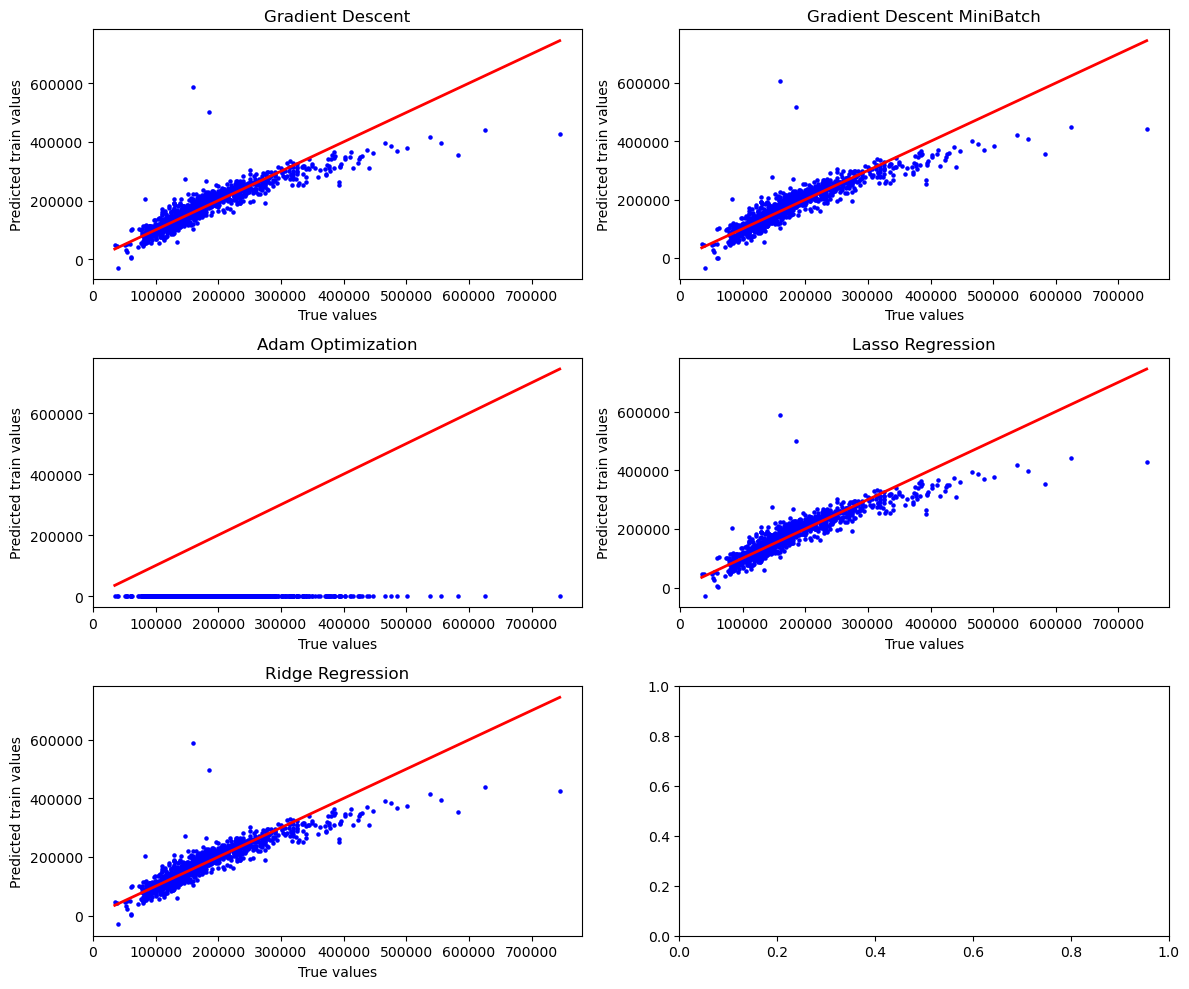

In [350]:
# Create subplots for predictions
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, (name, y_pred_train) in zip(axs.flatten(), predictions.items()):
    ax.scatter(y_train, y_pred_train, color="blue", s=5)
    ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linewidth=2)
    ax.set_title(name)
    ax.set_xlabel("True values")
    ax.set_ylabel("Predicted train values")

plt.tight_layout()
plt.show()


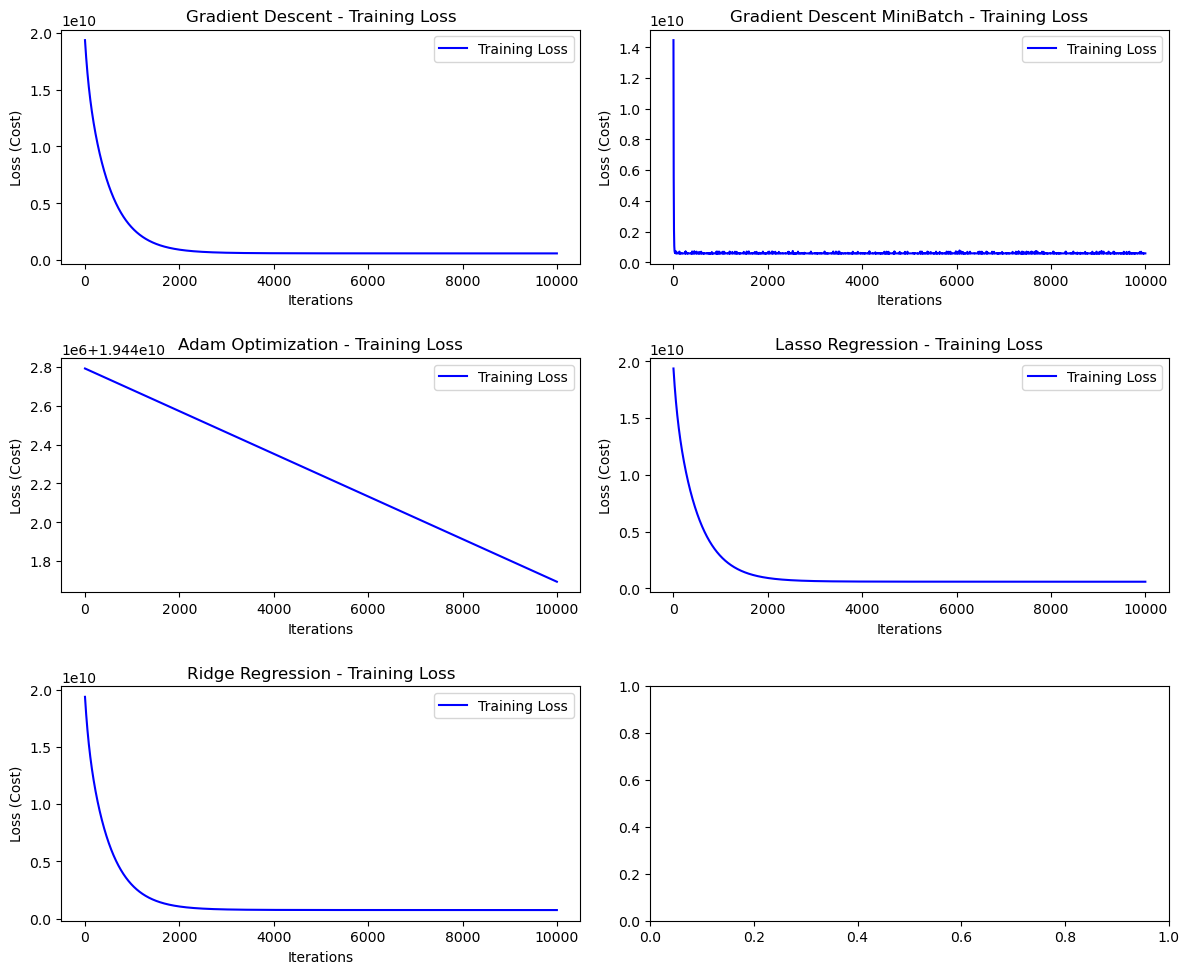

In [351]:
# Create subplots for training loss
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, (name, loss) in zip(axs.flatten(), training_losses.items()):
    ax.plot(loss, label="Training Loss", color="blue")
    ax.set_title(f"{name} - Training Loss")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss (Cost)")
    ax.legend()

plt.tight_layout()
plt.show()

# Predicting

In [352]:
def mean_squared_error_manual(y_true, y_pred):
    """
    Computes the Mean Squared Error (MSE) between actual and predicted values.
    """
    n = len(y_true)
    return np.sum((y_true - y_pred) ** 2) / n

def r2_score_manual(y_true, y_pred):
    """
    Computes the R² Score (Coefficient of Determination).
    """
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    return 1 - (ss_residual / ss_total)

def evaluate_manual(y_true, y_pred, model_name):
    """
    Evaluates the performance of a regression model using manual MSE and R².
    """
    mse = mean_squared_error_manual(y_true, y_pred)
    r2 = r2_score_manual(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    return mse, r2


In [353]:
# Train best models and store training losses
losses_test = {}
predictions_test = {}

for name, model in best_models.items():
    y_pred_test = model.predict(X_test)
    predictions_test[name] = y_pred_test
    losses_test[name] = model.get_training_loss()

results = {}
for model_name, predictions in predictions_test.items():
    mse, r2 = evaluate_manual(y_test, predictions, model_name)
    results[model_name] = (mse, r2)

# Select the best model based on the highest R2 score (and lowest MSE in case of tie)
best_model = max(results, key=lambda x: (results[x][1], -results[x][0]))
print(f"\nBest Model Selected: {best_model}")

Gradient Descent - MSE: 1359967141.8507, R² Score: 0.8227
Gradient Descent MiniBatch - MSE: 1326254927.8804, R² Score: 0.8271
Adam Optimization - MSE: 39652121340.3173, R² Score: -4.1695
Lasso Regression - MSE: 1359965445.1068, R² Score: 0.8227
Ridge Regression - MSE: 1378109928.0926, R² Score: 0.8203

Best Model Selected: Gradient Descent MiniBatch


# Submit

In [354]:
# Load test dataset
if not vscode_info:
    test_data = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
else:
    test_data = pd.read_csv("data/test.csv")

Id = test_data['Id']
test_data[features] = test_data[features].fillna(test_data[features].median())
test_data[features] = (test_data[features] - test_data[features].mean()) / test_data[features].std()

X_submit = np.c_[np.ones((test_data.shape[0], 1)), test_data[features].values]

# Predict using the best model
final_predictions = best_models[best_model].predict(X_submit)

# Create submission file
submission = pd.DataFrame({"Id": Id, "SalePrice": final_predictions.flatten()})
submission.to_csv("submission.csv", index=False)
print("Submission file generated: submission.csv")

Submission file generated: submission.csv
